<a href="https://colab.research.google.com/github/syaefulalam/sentimen-analysis/blob/master/Online_retailers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

#Load data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
transactions = pd.read_csv('/content/drive/My Drive/coba/OnlineRetail (1).csv', engine='python')

# ! ls '/content/drive/My Drive'

Mounted at /content/drive


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Sample Data

transactions.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
#Understanding the data in a more descriptive manner
transactions.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [0]:
#remove quantity <0

transactions_clean=transactions[transactions.Quantity >= 0]

In [12]:
#Understanding the data in a more descriptive manner
transactions_clean.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


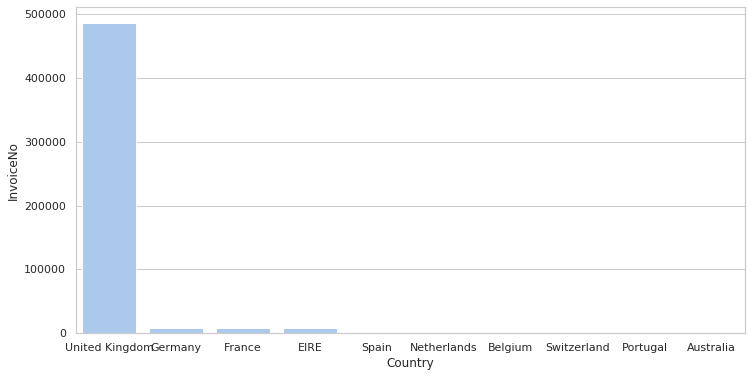

In [13]:
#Top 10 Country in number of transactions

tr_country=transactions_clean.groupby(by=['Country'], as_index=False)['InvoiceNo'].count().nlargest(10, 'InvoiceNo')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("pastel")
sns.barplot(x='Country', y='InvoiceNo', data=tr_country,
            label="Total", color="b")

In [0]:
#Top 10 Product in Quantity


In [14]:
#Add new variable 

#Add the column - amount_spent
transactions_clean['amount_spent'] = transactions_clean['Quantity'] * transactions_clean['UnitPrice']

#Add the columns - Year, Month, Day


transactions_clean['InvoiceDate'] = pd.to_datetime(transactions_clean['InvoiceDate'], format='%m/%d/%Y %H:%M')
transactions_clean['year']=transactions_clean['InvoiceDate'].dt.year
transactions_clean['month']=transactions_clean['InvoiceDate'].dt.month
transactions_clean['day']=transactions_clean['InvoiceDate'].dt.day


#Add hour and others flag related to time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
transactions_clean.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1


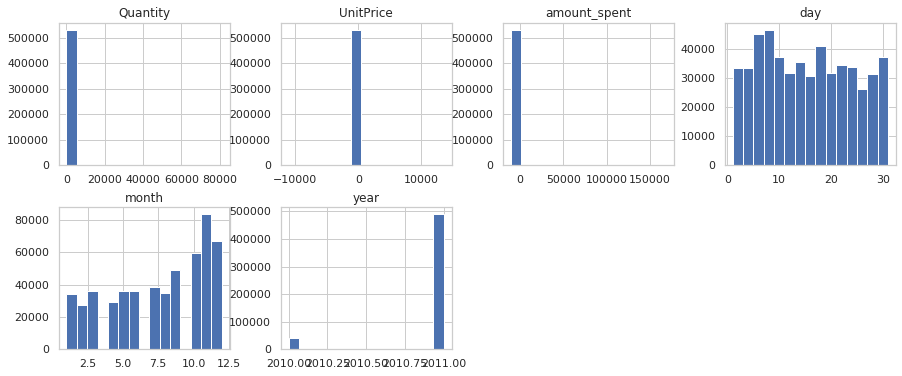

In [0]:
numerical = ['UnitPrice','Quantity','amount_spent','year','month','day']

transactions_clean[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

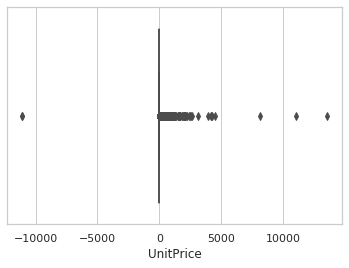

In [0]:
#Detect outlier
sns.boxplot(x=transactions_clean['UnitPrice'])

In [0]:
#Factors related to Quantity

df=transactions_clean[['StockCode','Description','Quantity','UnitPrice','Country','amount_spent','year','month','day']]
df=df.groupby(['StockCode','Description','UnitPrice','Country','amount_spent','year','month','day'], as_index=False)['Quantity'].agg('sum')

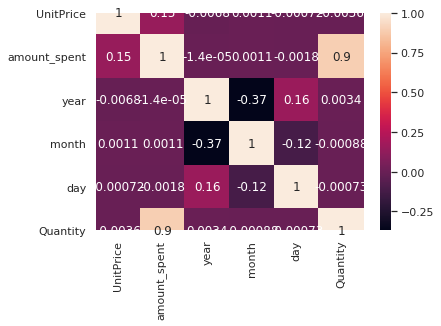

In [0]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

In [0]:
#Add new variable 

#max min sum mean